In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tweepy 


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install wordcloud

     |████████████████████████████████| 366 kB 22.1 MB/s eta 0:00:01    |███▋                            | 40 kB 28.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt

In [4]:
#conection
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAF%2BCdAEAAAAAWIMwt5o94xvcEPjK8MqdgUHgdfk%3DJ7GBZWDvqJ9RLXZXN7eUjqPs2b6qeLuYoD2tCq2h2NYnnGECao'
client = tweepy.Client(bearer_token)

In [12]:
#buscando os dados

response = client.search_recent_tweets("sabesp", max_results=100)

In [13]:
#trazendo os dados
tweets = response.data

for tweet in tweets:
    print(tweet.text)


RT @renato_battista: Em 2023 vou requerer a frente parlamentar pela privatização da Sabesp. https://t.co/SmVIdcv4eR
Alô @sabesp que fez vários buracos na rua José Tártini CEP 05886-090, já ha quase um mês e nada de tapar , que vergonha,  em tempo de causar acidentes com carros desviando dos buracos .
@meirelles O Secretário da Fazenda que cobra privatizações no âmbito federal mas que, mesmo com todas as condições favoráveis, não privatizou nem a SABESP.
@sabesp vcs poderiam nos avisar, e com antecedência sobre manutenção na rede. Ainda mais em um condomínio com 200 unidades.
@sabesp @clarissacoma_ É pra entrar na fila receber informação errada de dois atendentes e no final, ter o atendimento encerrado sem o chamado ter sido resolvido. @sabesp
@sabesp @taoquei1 Depois de praticamente um dia inteiro não resolveram meu problema, em anexo a “solução” que foi me passada via DM , uma vergonha. @rodrigobocardi peço por favor me ajudar. https://t.co/skPPgvcS3v
@sabesp vazamento de água há 1 mê

In [14]:

tweets_list =[[tweet.text]for tweet in tweets]
df = pd.DataFrame(tweets_list, columns=['Texto'])
pd.options.display.max_colwidth =180
df.head()

,Texto
0,RT @renato_battista: Em 2023 vou requerer a frente parlamentar pela privatização da Sabesp. https://t.co/SmVIdcv4eR
1,"Alô @sabesp que fez vários buracos na rua José Tártini CEP 05886-090, já ha quase um mês e nada de tapar , que vergonha, em tempo de causar acidentes com carros desviando dos ..."
2,"@meirelles O Secretário da Fazenda que cobra privatizações no âmbito federal mas que, mesmo com todas as condições favoráveis, não privatizou nem a SABESP."
3,"@sabesp vcs poderiam nos avisar, e com antecedência sobre manutenção na rede. Ainda mais em um condomínio com 200 unidades."
4,"@sabesp @clarissacoma_ É pra entrar na fila receber informação errada de dois atendentes e no final, ter o atendimento encerrado sem o chamado ter sido resolvido. @sabesp"


In [15]:
#agrupando
string = pd.Series(df['Texto'].values).str.cat(sep='')
string

'RT @renato_battista: Em 2023 vou requerer a frente parlamentar pela privatização da Sabesp. https://t.co/SmVIdcv4eRAlô @sabesp que fez vários buracos na rua José Tártini CEP 05886-090, já ha quase um mês e nada de tapar , que vergonha,  em tempo de causar acidentes com carros desviando dos buracos .@meirelles O Secretário da Fazenda que cobra privatizações no âmbito federal mas que, mesmo com todas as condições favoráveis, não privatizou nem a SABESP.@sabesp vcs poderiam nos avisar, e com antecedência sobre manutenção na rede. Ainda mais em um condomínio com 200 unidades.@sabesp @clarissacoma_ É pra entrar na fila receber informação errada de dois atendentes e no final, ter o atendimento encerrado sem o chamado ter sido resolvido. @sabesp@sabesp @taoquei1 Depois de praticamente um dia inteiro não resolveram meu problema, em anexo a “solução” que foi me passada via DM , uma vergonha. @rodrigobocardi peço por favor me ajudar. https://t.co/skPPgvcS3v@sabesp vazamento de água há 1 mês na 

In [16]:
#Limpando
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

dfdados = string

In [36]:
#Ignorando palavras

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["mais","está","das","na","meu","todos","todo","ir","dos","nos","só","mas","t","se","pra","quem","os","por","o","seu","isto","este","com","RT","de","da","esse","essa","esta","é","e","https","para","dar","pois","em","um","uma","que","qual","tem","temos","nós","este,da,de,do,sua,ou,ser,quando,muito,há,nos,já,está,eu,também,só,pelo,pela,até,isso,ela,entre,era,depois,sem,mesmo,aos,ter,seus,quem,nas,me,esse,eles,estão,você,tinha,foram,essa,num,nem,suas,meu,às,minha,têm,numa,pelos,elas,havia,seja,qual,será,nós,tenho,lhe,deles,essas,esses,pelas,este,fosse,dele,tu,te,vocês,vos,lhes,meus,minhas,teu,tua,teus,tuas,nosso,nossa,nossos,nossas,dela,delas,esta,estes,estas,aquele,aquela,aqueles,aquelas,isto,aquilo,estou,está,estamos,estão,estive,esteve,estivemos,estiveram,estava,estávamos,estavam,estivera,estivéramos,esteja,estejamos,estejam,estivesse,estivéssemos,estivessem,estiver,estivermos,estiverem,hei,há,havemos,hão,houve,houvemos,houveram,houvera,houvéramos,haja,hajamos,hajam,houvesse,houvéssemos,houvessem,houver,houvermos,houverem,houverei,houverá,houveremos,houverão,houveria,houveríamos,houveriam,sou,somos,são,era,éramos,eram,fui,foi,fomos,foram,fora,fôramos,seja,sejamos,sejam,fosse,fôssemos,fossem,for,formos,forem,serei,será,seremos,serão,seria,seríamos,seriam,tenho,tem,temos,tém,tinha,tínhamos,tinham,tive,teve,tivemos,tiveram,tivera,tivéramos,tenha,tenhamos,tenham,tivesse,tivéssemos,tivessem,tiver,tivermos,tiverem,terei,terá,teremos,terão,teria,teríamos,teriam"])

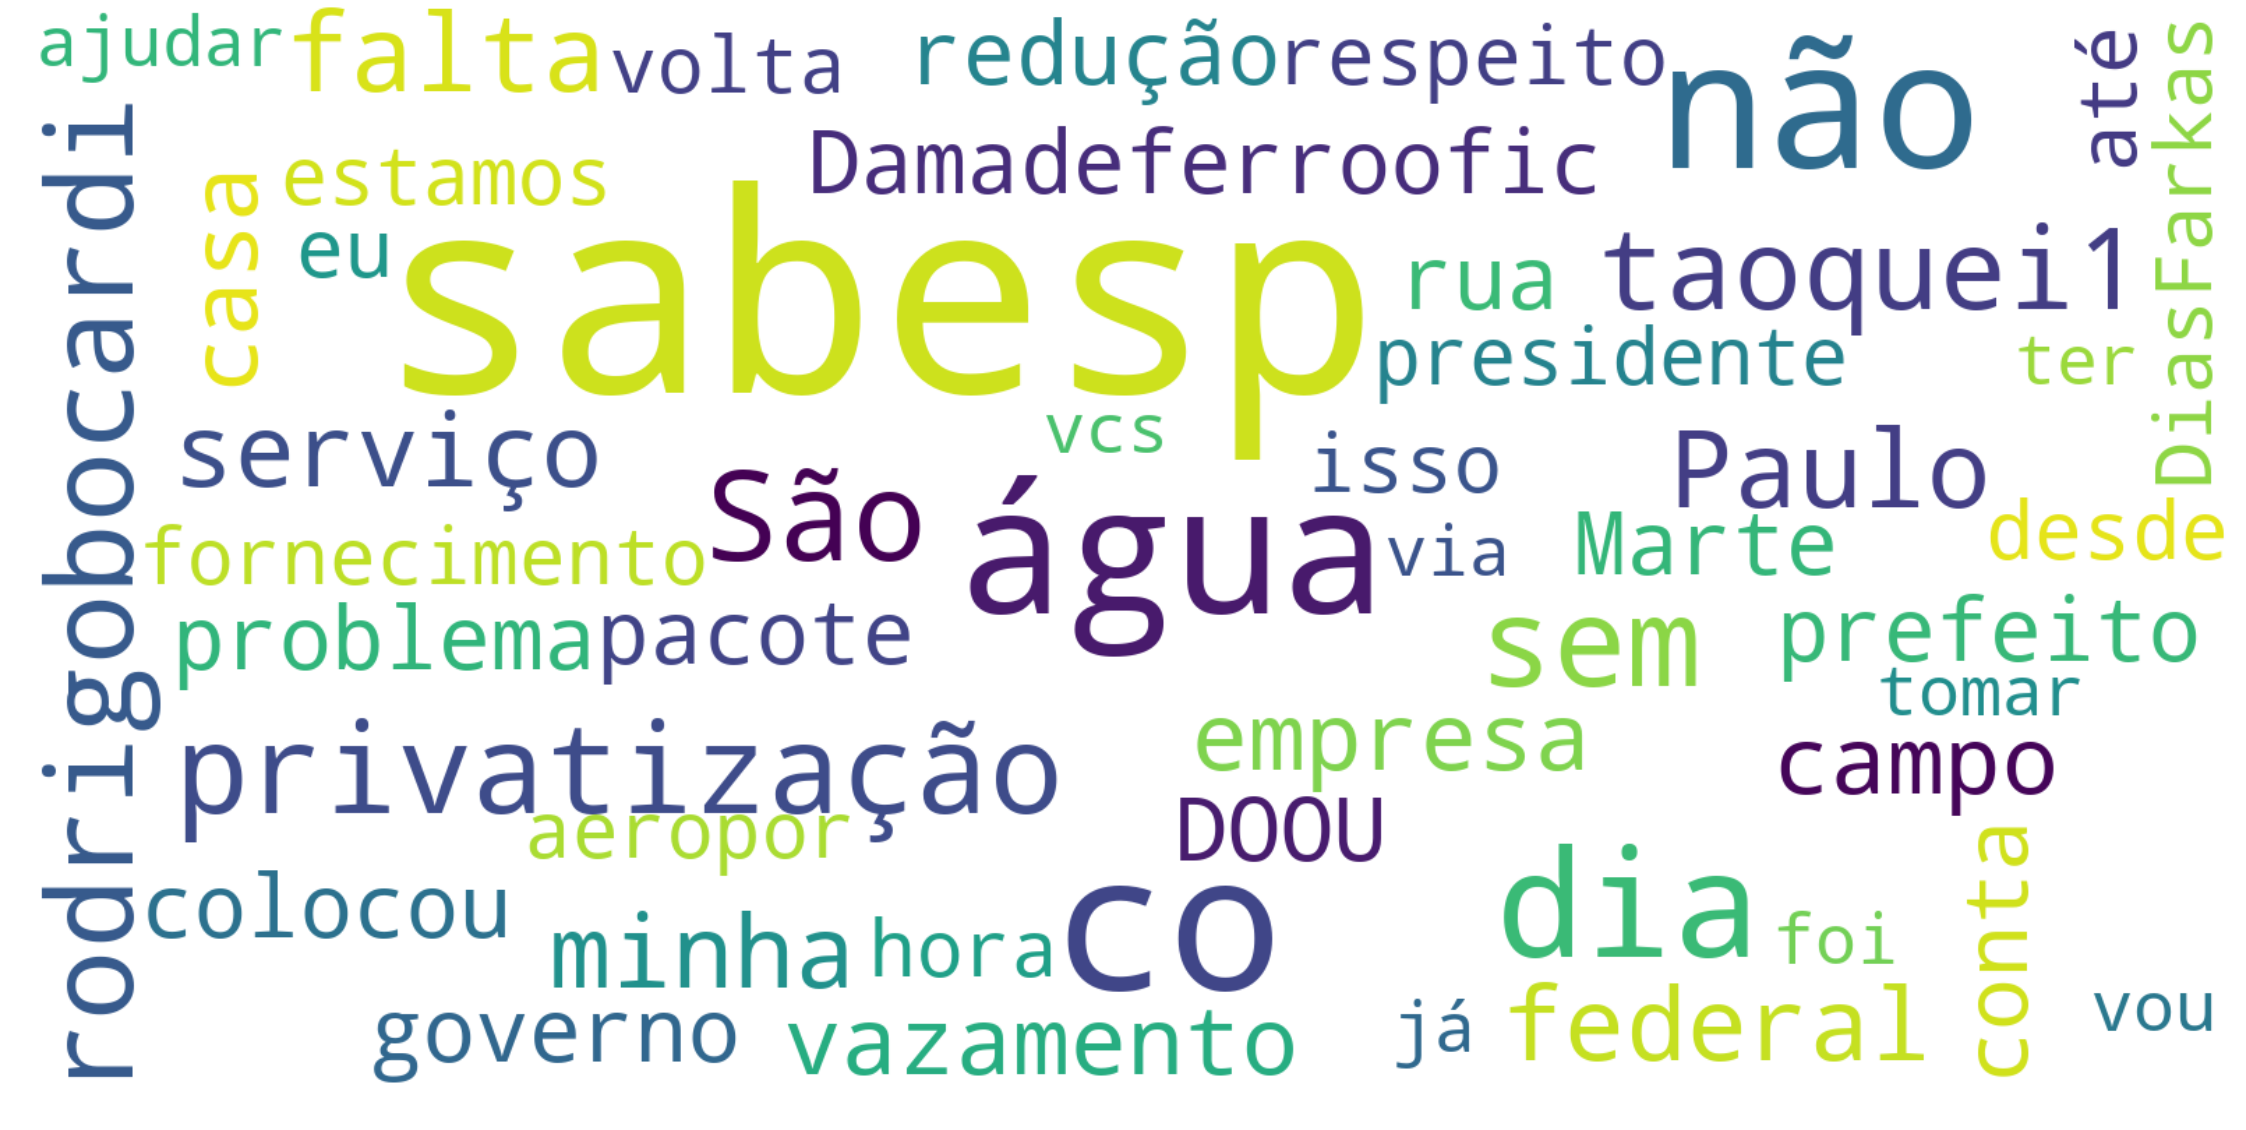

In [38]:
#Word Cloud

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()